##  THU THẬP VÀ TÍCH HỢP DỮ LIỆU TỪ CÁC NGUỒN, CÁC ĐỊNH DẠNG KHÁC NHAU
---

**MÔ TẢ BÀI TOÁN:**
Thu thập và tích hợp dữ liệu để cho biết 5 bang của nước Mỹ có mật độ dân số **CAO NHẤT, THẤP NHẤT** giai đoạn năm 2010

<img src = 'Pic/USA_Population_Density.png' width='600px'>

**THU THẬP DỮ LIỆU:**
Để xác định được mật độ dân số các bang của Mỹ năm 2010 cần thu thập được dữ liệu về dân số các bang năm 2010 và dữ liệu về diện tích của các bang.

- Dữ liệu dân số được thu thập từ Cục Điều tra Dân số Hoa Kỳ (U.S. Census Bureau): Lưu trữ trong file Excel state_population.xlsx
- Dữ liệu diện tích được thu thập từ Cục Quản lý Đất đai (Bureau of Land Management - BLM): Lưu trữ trong file CSV state_areas.csv

In [2]:
#Gọi các thư viện sử dụng:
import pandas as pd
import matplotlib.pyplot as plt

#-------------------------------------
import warnings
warnings.filterwarnings('ignore')

## 1. Đọc dữ liệu dân số (file .excel)
---
* **Dữ liệu dân số (state_population.xlsx):** Lưu trữ trong file Excel từ năm 1990 đến năm 2013; Mỗi năm lưu trong một sheet bao gồm các thông tin: 
    * Số thứ tự
    * state/region: Mã bang 
    * ages: nhóm tuổi: total (toàn bộ) - under 18 (dưới 18 tuổi)
    * year: năm
    * population: dân số

In [3]:
#Đọc dữ liệu từ file Excel: chọn năm 2010
data_population_2010 = pd.read_excel('Data/state_population.xlsx',
                                     sheet_name='2010') # đọc sheet 2010
data_population_2010

,Unnamed: 0,state/region,ages,year,population
0,0,AK,total,2010,713868
1,1,AK,under18,2010,187902
2,2,AL,total,2010,4785570
3,3,AL,under18,2010,1130966
4,4,AR,total,2010,2922280
...,...,...,...,...,...
99,99,WI,under18,2010,1336094
100,100,WV,total,2010,1854146
101,101,WV,under18,2010,387224
102,102,WY,total,2010,564222


In [4]:
#Lọc dữ liệu lấy thông tin tổng dân số của bang: ages = 'total'
data_population_2010 = data_population_2010[data_population_2010['ages']=='total']
data_population_2010.head()

,Unnamed: 0,state/region,ages,year,population
0,0,AK,total,2010,713868
2,2,AL,total,2010,4785570
4,4,AR,total,2010,2922280
6,6,AZ,total,2010,6408790
8,8,CA,total,2010,37333601


In [5]:
#Tách lấy cột state/region và population:
data_population_2010 =data_population_2010[['state/region','population']]
data_population_2010.head()

,state/region,population
0,AK,713868
2,AL,4785570
4,AR,2922280
6,AZ,6408790
8,CA,37333601


## 2. Đọc dữ liệu diện tích (file .csv)
---
* **Dữ liệu diện tích (state_areas.csv):** Lưu trữ trong file CSV, thông tin diện tích các bang của nước Mỹ:
    * state: Tên bang
    * area: diện tích - dặm vuông sq.mi 

In [6]:
#Đọc dữ liệu diện tích từ file .csv
data_area = pd.read_csv('Data/state_areas.csv')
data_area.head()


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


## 3. Đọc dữ liệu mã bang (file .txt)
---
Dữ liệu mã bang state_code.txt. Lưu trữ trong file txt cho biết thông tin Tên và ký hiệu từng bang của Mỹ

In [7]:
#Đọc dữ liệu từ file .txt
data_code = pd.read_csv('Data/state_code.txt',
                       header=None,
                       names=['name','code'])
data_code.head()

,name,code
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


## 4. Tích hợp dữ liệu từ các file khác nhau thành một file duy nhất
---

In [8]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [9]:
display('data_population_2010.head(10)', 
        'data_area.head(10)' ,
        'data_code.head(10)')

,state/region,population
0,AK,713868
2,AL,4785570
4,AR,2922280
6,AZ,6408790
8,CA,37333601
10,CO,5048196
12,CT,3579210
14,DC,605125
16,DE,899711
18,FL,18846054


In [10]:
#Tích hợp data_code với data_area
data_1 = data_code.merge( data_area,
                        left_on='name',# khóa của bảng bên trái
                        right_on='state') # khóa của bảng bên phải
data_1.head()

,name,code,state,area (sq. mi)
0,Alabama,AL,Alabama,52423
1,Alaska,AK,Alaska,656425
2,Arizona,AZ,Arizona,114006
3,Arkansas,AR,Arkansas,53182
4,California,CA,California,163707


In [11]:
#Tích hợp dữ liệu data với dữ liệu dân số:

data_area_pop = data_1.merge(data_population_2010,
                             left_on='code',
                             right_on='state/region')
data_area_pop.head()



,name,code,state,area (sq. mi),state/region,population
0,Alabama,AL,Alabama,52423,AL,4785570
1,Alaska,AK,Alaska,656425,AK,713868
2,Arizona,AZ,Arizona,114006,AZ,6408790
3,Arkansas,AR,Arkansas,53182,AR,2922280
4,California,CA,California,163707,CA,37333601


In [12]:
#Chỉ lấy các cột quan trọng, bỏ các cột bị trùng lặp:
data_area_pop = data_area_pop.drop(['name','state/region'], axis=1)
data_area_pop.head()

,code,state,area (sq. mi),population
0,AL,Alabama,52423,4785570
1,AK,Alaska,656425,713868
2,AZ,Arizona,114006,6408790
3,AR,Arkansas,53182,2922280
4,CA,California,163707,37333601


In [13]:
# Tính toán mật độ dân số population_density = 'population'/'area (sq. mi)', làm tròn ko lấy số lẻ
import numpy as np

data_area_pop['density']= np.round(data_area_pop['population']/data_area_pop['area (sq. mi)'],0)
# ép sang kiểu số nguyên 
data_area_pop['density']=data_area_pop['density'].astype(int)

data_area_pop.head()

,code,state,area (sq. mi),population,density
0,AL,Alabama,52423,4785570,91
1,AK,Alaska,656425,713868,1
2,AZ,Arizona,114006,6408790,56
3,AR,Arkansas,53182,2922280,55
4,CA,California,163707,37333601,228


In [14]:
#Sắp xếp dữ liệu theo giá trị cột mật độ giảm dần:

data_area_pop.sort_values(by=['density'],
                         ascending=False, # xếp tăng dần 
                         inplace=True)  
data_area_pop

,code,state,area (sq. mi),population,density
8,DC,District of Columbia,68,605125,8899
39,PR,Puerto Rico,3515,3721208,1059
24,NJ,New Jersey,8722,8802707,1009
40,RI,Rhode Island,1545,1052669,681
6,CT,Connecticut,5544,3579210,646
33,MA,Massachusetts,10555,6563263,622
32,MD,Maryland,12407,5787193,466
7,DE,Delaware,1954,899711,460
26,NY,New York,54475,19398228,356
9,FL,Florida,65758,18846054,287


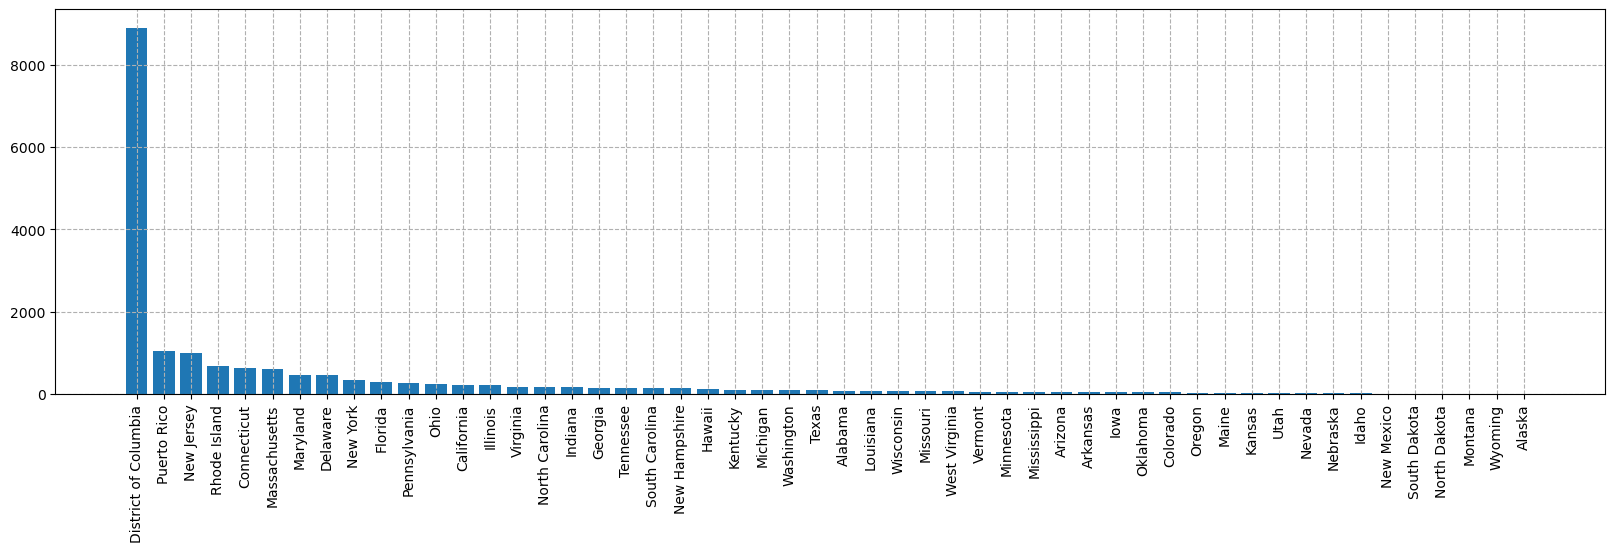

In [15]:
#Trực quan hóa dữ liệu mật độ lên biểu đồ:

plt.figure(figsize=(20,5))
plt.bar(data_area_pop['state'], # barh dọc ,bar ngang
         data_area_pop['density'])
plt.grid(ls='--')
plt.xticks(rotation=90)
plt.show()


In [16]:
#5 bang có mật độ dân số lớn nhất năm 2010
Top_5_max = data_area_pop.head(5)

print ('5 bang có mật độ cao nhất là :')
Top_5_max


5 bang có mật độ cao nhất là :


,code,state,area (sq. mi),population,density
8,DC,District of Columbia,68,605125,8899
39,PR,Puerto Rico,3515,3721208,1059
24,NJ,New Jersey,8722,8802707,1009
40,RI,Rhode Island,1545,1052669,681
6,CT,Connecticut,5544,3579210,646


In [17]:
#5 bang có mật độ dân số thấp nhất năm 2010
Top_5_min = data_area_pop.tail(5)

print ('5 bang có mật độ thấp  nhất là :')
Top_5_min



5 bang có mật độ thấp  nhất là :


,code,state,area (sq. mi),population,density
42,SD,South Dakota,77121,816211,11
28,ND,North Dakota,70704,674344,10
20,MT,Montana,147046,990527,7
51,WY,Wyoming,97818,564222,6
1,AK,Alaska,656425,713868,1


In [18]:
#Lưu dữ liệu ra file: csv
data_area_pop.to_csv('Data_OK_2010.csv',
                    index=None)

In [19]:
#Lưu dữ liệu ra file: excel
data_area_pop.to_excel('Data_OK_2010.xlsx',
                    index=None)


---
Tập dữ liệu Data_Movies.xlsx lưu trữ danh sách các bộ phim đã công chiếu. Mỗi một bộ film bao gồm 25 thuộc tính khác nhau. Dữ liệu được lưu thành 3 sheet:
* Sheet 1900s: Lưu trữ danh sách các bộ phim công chiếu trước năm 2000
* Sheet 2000s: Lưu trữ danh sách những bộ phim công chiếu từ năm 2000 đến trước năm 2010.
* Sheet 2010s: Lưu trữ danh sách những bộ phim công chiếu từ năm 2010 đến nay

**YÊU CẦU:**

1. Đọc dữ liệu từng sheet trong file excel và tích hợp thành một bảng dữ liệu duy nhất chứa tất cả các bộ phim.
2. Tạo bảng dữ liệu mới chỉ sử dụng 7 thuộc tính quan trọng sau:
    - Title: Tên phim
    - Year: Năm phát hành
    - Genres: Thể loại phim
    - Country: Quốc gia
    - Director: Đạo diễn phim
    - User Votes: Số lượng người xem đánh giá
    - IMDB Score: Điểm đánh giá trung bình
    
Sắp xếp các bộ phim theo thứ tự IMDB Score giảm dần, nếu bộ phim có IMDB Score bằng nhau thì sắp xếp theo thuộc tính User Votes giảm dần.

3. Lưu dữ liệu ra file định dạng CSV: Data_Movies_OK.csv


# 1. Đọc dữ liệu từng sheet trong file excel và tích hợp thành một bảng dữ liệu duy nhất chứa tất cả các bộ phim.

In [20]:

# Đọc dữ liệu từng sheet trong file excel
sheet_1900s = pd.read_excel('Data/Data_Movies.xlsx ', sheet_name='1900s')
sheet_2000s = pd.read_excel('Data/Data_Movies.xlsx ', sheet_name='2000s',
                              skiprows=3)
sheet_2010s = pd.read_excel('Data/Data_Movies.xlsx ', sheet_name='2010s',
                            header=None,
                            skiprows=3)

# đọc sheet_1900s
print('Sheet_1900s.head(5)')
sheet_1900s.head(5)

Sheet_1900s.head(5)


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [21]:
# Đọc sheet_2000s
print('Sheet_2000s.head(5)')
sheet_2000s.head(5)

Sheet_2000s.head(5)


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,...,2000.0,795.0,439.0,4182,372,1,26413,77.0,84.0,4.8
1,28 Days,2000,Comedy|Drama,English,USA,PG-13,103.0,1.37,43000000.0,37035515.0,...,12000.0,10000.0,664.0,23864,0,1,34597,194.0,116.0,6.0
2,3 Strikes,2000,Comedy,English,USA,R,82.0,1.85,6000000.0,9821335.0,...,939.0,706.0,585.0,3354,118,1,1415,10.0,22.0,4.0
3,Aberdeen,2000,Drama,English,UK,NaN,106.0,1.85,6500000.0,64148.0,...,844.0,2.0,0.0,846,260,0,2601,35.0,28.0,7.3
4,All the Pretty Horses,2000,Drama|Romance|Western,English,USA,PG-13,220.0,2.35,57000000.0,15527125.0,...,13000.0,861.0,820.0,15006,652,2,11388,183.0,85.0,5.8


In [22]:
# Đọc tên cột từ sheet 2000s
column_names = sheet_2000s.columns

# Đặt tên cho các cột trong DataFrame từ sheet 2010s
sheet_2010s.columns = column_names
print('Sheet_2010s.head(5)')
sheet_2010s.head(5)

Sheet_2010s.head(5)


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
1,3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,...,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
2,3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,...,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
3,8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,...,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
4,A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,...,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1


In [23]:
# tích hợp thành một bảng dữ liệu duy nhất chứa tất cả các bộ phim.
sheet_movies = pd.concat([sheet_1900s, sheet_2000s, sheet_2010s], ignore_index=True)
sheet_movies


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
5038,Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
5039,Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
5040,Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7


# 2.Tạo bảng dữ liệu mới chỉ sử dụng 7 thuộc tính quan trọng sau:
Title: Tên phim
Year: Năm phát hành
Genres: Thể loại phim
Country: Quốc gia
Director: Đạo diễn phim
User Votes: Số lượng người xem đánh giá
IMDB Score: Điểm đánh giá trung bình

In [24]:
sheet_movies=sheet_movies[['Title','Year','Genres','Country','Director','User Votes','IMDB Score']]
sheet_movies.head(5)

,Title,Year,Genres,Country,Director,User Votes,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,USA,D.W. Griffith,10718,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,USA,Harry F. Millarde,5,4.8
2,The Big Parade,1925.0,Drama|Romance|War,USA,King Vidor,4849,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,Germany,Fritz Lang,111841,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,Germany,Georg Wilhelm Pabst,7431,8.0


In [25]:
# Sắp xếp theo 'IMDB Score' giảm dần, sau đó là 'User Votes' giảm dần
sheet_movies_sorted = sheet_movies.sort_values(by=['IMDB Score', 'User Votes'], ascending=[False, False])


sheet_movies_sorted


,Title,Year,Genres,Country,Director,User Votes,IMDB Score
5031,Towering Inferno,NaN,Comedy,Canada,John Blanchard,10,9.5
742,The Shawshank Redemption,1994.0,Crime|Drama,USA,Frank Darabont,1689764,9.3
178,The Godfather,1972.0,Crime|Drama,USA,Francis Ford Coppola,1155770,9.2
4955,Dekalog,NaN,Drama,Poland,NaN,12591,9.1
4954,Dekalog,NaN,Drama,Poland,NaN,12590,9.1
...,...,...,...,...,...,...,...
2986,Disaster Movie,2008.0,Comedy,USA,Jason Friedberg,74945,1.9
2226,Superbabies: Baby Geniuses 2,2004.0,Comedy|Family|Sci-Fi,Germany,Bob Clark,25371,1.9
2452,The Helix... Loaded,2005.0,Action|Adventure|Comedy|Fantasy|Sci-Fi,USA,A. Raven Cruz,534,1.9
3947,Foodfight!,2012.0,Action|Animation|Comedy|Family|Fantasy,USA,Lawrence Kasanoff,4377,1.7


# 3.Lưu dữ liệu ra file định dạng CSV: Data_Movies_OK.csv

In [26]:
#Lưu dữ liệu ra file: csv
sheet_movies.to_csv('Data_Movies_OK.csv',
                    index=None)